In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
## Examine the columns, look at missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
churn_count = df.Churn.value_counts()
churn_count

No     5174
Yes    1869
Name: Churn, dtype: int64

In [5]:
# print churn balance
print(f'Churn: {churn_count[1]}')
print(f'No Churn: {churn_count[0]}')
print(f'Percentage of Churn: {round(churn_count[1] / sum(churn_count),3) *100} %')

Churn: 1869
No Churn: 5174
Percentage of Churn: 26.5 %


In [6]:
df.describe

<bound method NDFrame.describe of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DS

In [ ]:
#check that each customer is unique
pd.Series(df['customerID']).is_unique

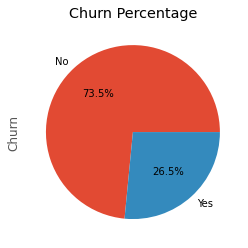

In [7]:
#fig1, ax1 = plt.subplots()
#ax1.pie(sizes, labels=churn_count[], autopct='%1.1f%%',shadow=False, startangle=90)

churn_count.plot(kind='pie', title='Churn Percentage', autopct='%1.1f%%');


In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
#Replace blank spaces in values in TotalCharges column.  Convert values to numeric.

df['TotalCharges'] = df['TotalCharges'].replace(" ", 0).astype('float32')
df['TotalCharges'] = df['TotalCharges'].apply(pd.to_numeric)
df['TotalCharges']

0         29.850000
1       1889.500000
2        108.150002
3       1840.750000
4        151.649994
           ...     
7038    1990.500000
7039    7362.899902
7040     346.450012
7041     306.600006
7042    6844.500000
Name: TotalCharges, Length: 7043, dtype: float64

In [10]:
dftelco = df.drop(['customerID'], axis=1)
dftelco

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.500000,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.500000,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.899902,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.450012,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.600006,Yes


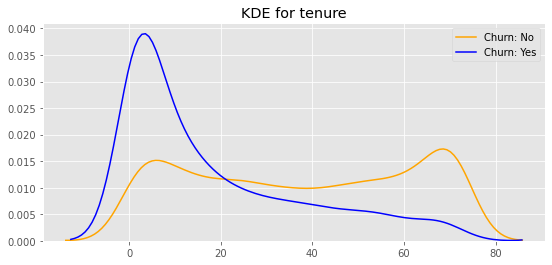

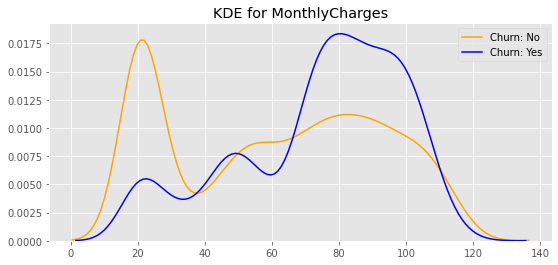

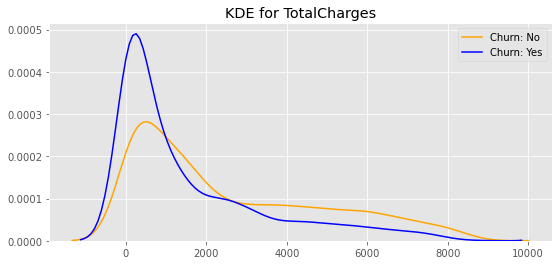

In [11]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(dftelco[dftelco['Churn'] == 'No'][feature].dropna(), color= 'orange', label= 'Churn: No')
    ax1 = sns.kdeplot(dftelco[dftelco['Churn'] == 'Yes'][feature].dropna(), color= 'blue', label= 'Churn: Yes')

kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

Someone with low tenure is more likely to churn than someone who has a longer tenure. Higher churn probability if tenure is less than 15 months. Someone with higher monthly charges(more than $65) is more likely to churn than someone with lower monthly charges. Someone who has a lower total charges with the telco is more likely to churn, maybe due to lower tenure with the telco.

In [13]:
def barplot_percentages(feature, orient='v', axis_name="percentage of customers"):
    
    
    g = dftelco.groupby(feature)["Churn"].value_counts().to_frame()  #groupby the feature type and value count of churn type and place in dataframe g
    g = g.rename({"Churn": axis_name}, axis=1).reset_index()    #rename churn to percentage churn
    g[axis_name] = (g[axis_name]/len(df))*100                         #change count values in column from count to percentage type
    
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=g, orient=orient)
        ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=g, orient=orient)
        ax.xaxis.set_major_formatter(mtick.PercentFormatter())
        
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
    ax.plot()

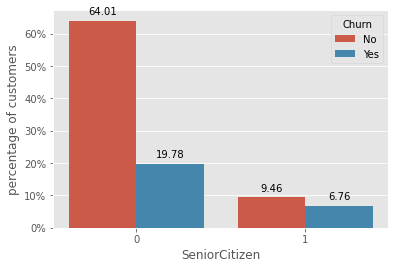

In [14]:
barplot_percentages("SeniorCitizen")

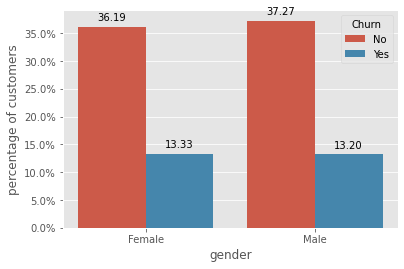

In [15]:
barplot_percentages("gender")

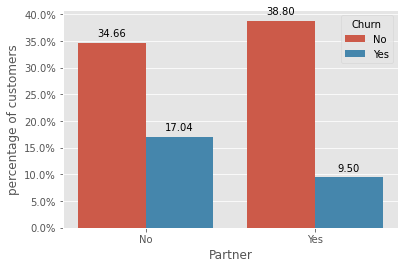

In [16]:
barplot_percentages("Partner")

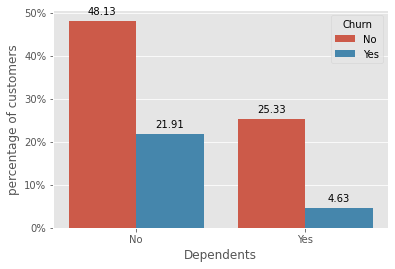

In [17]:
barplot_percentages("Dependents")

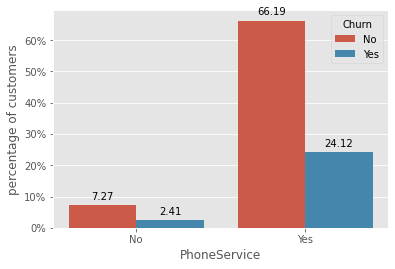

In [18]:
barplot_percentages("PhoneService")

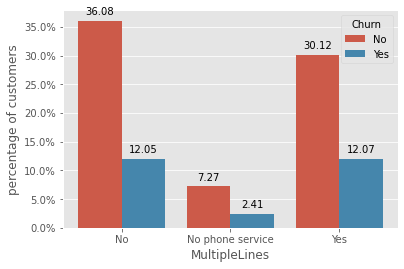

In [19]:
barplot_percentages("MultipleLines")

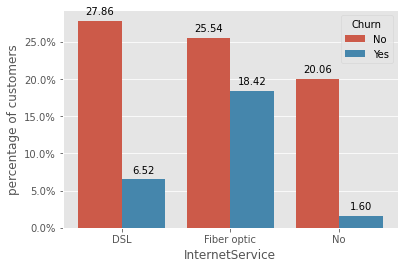

In [20]:
barplot_percentages("InternetService")

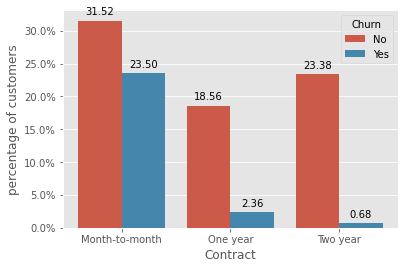

In [21]:
barplot_percentages("Contract")

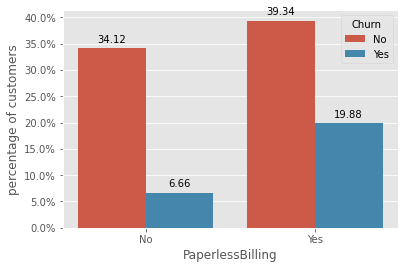

In [22]:
barplot_percentages("PaperlessBilling")

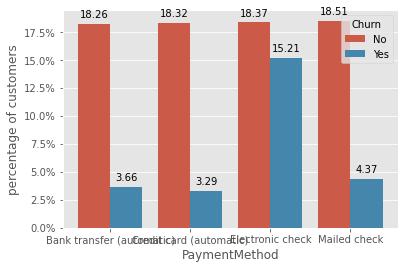

In [23]:
barplot_percentages("PaymentMethod")

In [34]:
dftelco.replace({'PaymentMethod':{'Electronic check':'EC','Mailed check':'MC', 'Bank transfer (automatic)':'BT_Auto','Credit card (automatic)':'CC_Auto'}},inplace = True)
dftelco

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,EC,29.85,29.850000,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,MC,56.95,1889.500000,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,MC,53.85,108.150002,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,BT_Auto,42.30,1840.750000,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,EC,70.70,151.649994,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,MC,84.80,1990.500000,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,CC_Auto,103.20,7362.899902,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,EC,29.60,346.450012,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,MC,74.40,306.600006,Yes


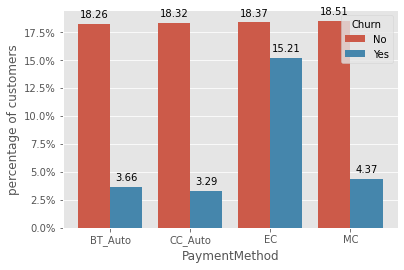

In [25]:
barplot_percentages("PaymentMethod")

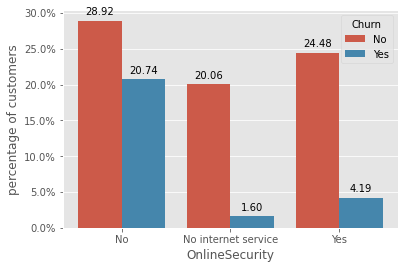

In [26]:
barplot_percentages("OnlineSecurity")

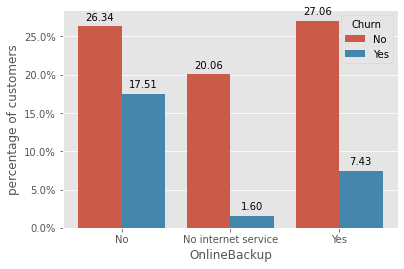

In [27]:
barplot_percentages("OnlineBackup")

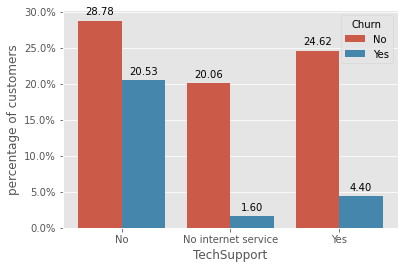

In [28]:
barplot_percentages("TechSupport")

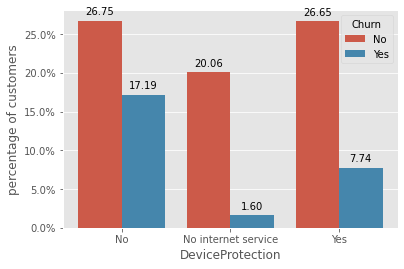

In [29]:
barplot_percentages("DeviceProtection")

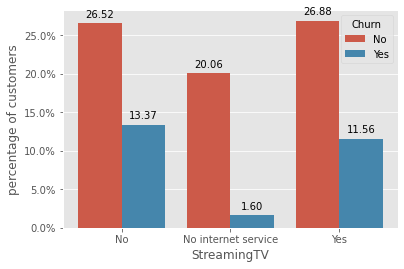

In [30]:
barplot_percentages("StreamingTV")

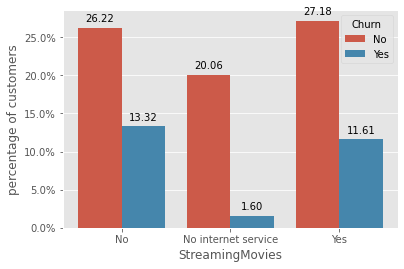

In [31]:
barplot_percentages("StreamingMovies")

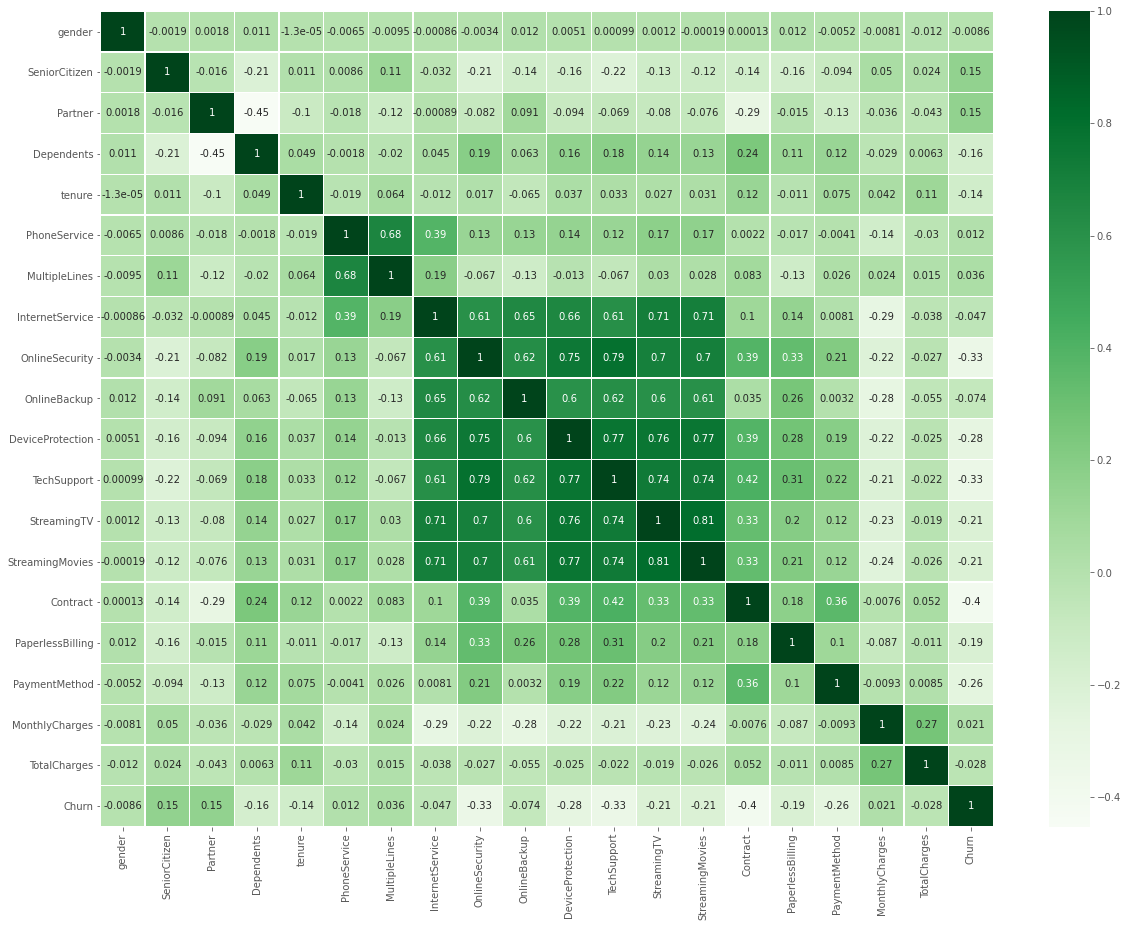

In [32]:
#Check correlation between features
#factorize to get a numeric representation of an array when all that matters is identifying distinct values.

plt.figure(figsize=(20, 15))
corr = dftelco.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="Greens", annot =  True)

In [36]:
telco2 = dftelco.drop(['gender','PhoneService','InternetService','OnlineBackup','StreamingMovies','StreamingTV','DeviceProtection','TechSupport'], axis = 1) 
#create telco2, drop features (>0.6 correlation) which are highly correlated to one another, and do one-hot encoding for categorical features.

In [37]:
telco2


,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,OnlineSecurity,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No phone service,No,Month-to-month,Yes,EC,29.85,29.850000,No
1,0,No,No,34,No,Yes,One year,No,MC,56.95,1889.500000,No
2,0,No,No,2,No,Yes,Month-to-month,Yes,MC,53.85,108.150002,Yes
3,0,No,No,45,No phone service,Yes,One year,No,BT_Auto,42.30,1840.750000,No
4,0,No,No,2,No,No,Month-to-month,Yes,EC,70.70,151.649994,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,24,Yes,Yes,One year,Yes,MC,84.80,1990.500000,No
7039,0,Yes,Yes,72,Yes,No,One year,Yes,CC_Auto,103.20,7362.899902,No
7040,0,Yes,Yes,11,No phone service,Yes,Month-to-month,Yes,EC,29.60,346.450012,No
7041,1,Yes,No,4,Yes,No,Month-to-month,Yes,MC,74.40,306.600006,Yes


In [38]:
categorical_cols = [c for c in telco2.columns if telco2[c].dtype == 'object'
                    or c == 'SeniorCitizen']
telco2_categorical = telco2[categorical_cols].copy()
telco2_categorical

,SeniorCitizen,Partner,Dependents,MultipleLines,OnlineSecurity,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,Yes,No,No phone service,No,Month-to-month,Yes,EC,No
1,0,No,No,No,Yes,One year,No,MC,No
2,0,No,No,No,Yes,Month-to-month,Yes,MC,Yes
3,0,No,No,No phone service,Yes,One year,No,BT_Auto,No
4,0,No,No,No,No,Month-to-month,Yes,EC,Yes
...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,Yes,Yes,One year,Yes,MC,No
7039,0,Yes,Yes,Yes,No,One year,Yes,CC_Auto,No
7040,0,Yes,Yes,No phone service,Yes,Month-to-month,Yes,EC,No
7041,1,Yes,No,Yes,No,Month-to-month,Yes,MC,Yes


In [39]:
for col in categorical_cols:
    if telco2_categorical[col].nunique() == 2:
        telco2_categorical[col],_ = pd.factorize(telco2_categorical[col])
    else:
        telco2_categorical = pd.get_dummies(telco2_categorical, columns=[col])

        
telco2_categorical.head(3)

,SeniorCitizen,Partner,Dependents,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_BT_Auto,PaymentMethod_CC_Auto,PaymentMethod_EC,PaymentMethod_MC
0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0
1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1
2,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1


In [40]:
#to avoid multicollinearity issues from one-hot encoding
telco2_categorical = telco2_categorical.drop(['MultipleLines_No phone service','OnlineSecurity_No internet service', 'Contract_Month-to-month','PaymentMethod_BT_Auto'], axis = 1)

In [41]:
telco2_categorical.head(3)

,SeniorCitizen,Partner,Dependents,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,Contract_One year,Contract_Two year,PaymentMethod_CC_Auto,PaymentMethod_EC,PaymentMethod_MC
0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,1,0,1,0,1,0,0,1,1,0,0,0,1
2,0,1,0,0,1,1,0,0,1,0,0,0,0,1


In [42]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
telco2_numerical = telco2[numerical_cols].copy()

In [43]:
telco2_numerical

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.850000
1,34,56.95,1889.500000
2,2,53.85,108.150002
3,45,42.30,1840.750000
4,2,70.70,151.649994
...,...,...,...
7038,24,84.80,1990.500000
7039,72,103.20,7362.899902
7040,11,29.60,346.450012
7041,4,74.40,306.600006


In [47]:
telco2numcat = pd.merge(telco2_numerical, telco2_categorical, left_index=True, right_index=True)
telco2numcat

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,Contract_One year,Contract_Two year,PaymentMethod_CC_Auto,PaymentMethod_EC,PaymentMethod_MC
0,1,29.85,29.850000,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,34,56.95,1889.500000,0,1,0,1,0,1,0,0,1,1,0,0,0,1
2,2,53.85,108.150002,0,1,0,0,1,1,0,0,1,0,0,0,0,1
3,45,42.30,1840.750000,0,1,0,1,0,0,0,0,1,1,0,0,0,0
4,2,70.70,151.649994,0,1,0,0,1,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.500000,0,0,1,0,0,0,1,0,1,1,0,0,0,1
7039,72,103.20,7362.899902,0,0,1,0,0,0,1,1,0,1,0,1,0,0
7040,11,29.60,346.450012,0,0,1,0,0,0,0,0,1,0,0,0,1,0
7041,4,74.40,306.600006,1,0,0,0,1,0,1,1,0,0,0,0,0,1


In [48]:
telco2numcat.to_csv (r'C:\LSY\Metis\syleo22_sgp20_ds4\Project3\TelcoCustChurn\telco2numcat1.csv',index = False)